In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
# from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
import os
import numpy as np
from astropy.table import Table, hstack
from scipy.spatial import cKDTree as KDTree

In [2]:
def read_isedfit():
    """Read the iSEDfit fitting results."""
    
#     parentfile = '/Users/mtownsend/anaconda/Data/lrg-survey-dr8-try5.fits'
    isedfile = '/Users/mtownsend/Downloads/lrgs_dr8_ckc14z_kroupa01_charlot_sfhgrid01.fits'
#     kcorrfile = '/Users/mtownsend/anaconda/Data/lrgs_ckc14z_kroupa01_charlot_sfhgrid01_kcorr.z0.0.fits'

#     print('Reading {}'.format(parentfile))
#     parent = Table.read(parentfile)
    print('Reading {}'.format(isedfile))
    ised = Table.read(isedfile)
#     print('Reading {}'.format(kcorrfile))
#     kcorr = Table.read(kcorrfile)
    
    snrmin = 3.0
    chi2min = 10
    
    keep = np.where(
        (ised['CHI2'] < chi2min) * 
        (np.sum(ised['MAGGIES'] * np.sqrt(ised['IVARMAGGIES']) > snrmin, axis=1) == 5)
    )[0]
    print('Read {} galaxies with chi2 < {} and S/N > {} in all 5 photometric bands.'.format(
        len(keep), chi2min, snrmin))
    
#     cat = dict()
#     cat['weight'] = len(keep) * parent['COUNT'][keep].data / np.sum(parent['COUNT'][keep].data)
#     cat['redshift'] = kcorr['Z'][keep].data
#     cat['Mstar'] = ised['MSTAR_50'][keep].data
#     cat['Mg'] = kcorr['ABSMAG'][keep, 0].data
#     cat['Mr'] = kcorr['ABSMAG'][keep, 1].data
#     cat['Mz'] = kcorr['ABSMAG'][keep, 2].data
#     cat['gr'] = cat['Mg'] - cat['Mr']
#     cat['rz'] = cat['Mr'] - cat['Mz']

#     with np.errstate(invalid='ignore'):
#         cat['grobs'] = -2.5 * np.log10( ised['MAGGIES'][keep, 0].data / ised['MAGGIES'][keep, 1].data )
#         cat['rzobs'] = -2.5 * np.log10( ised['MAGGIES'][keep, 1].data / ised['MAGGIES'][keep, 2].data )
#         cat['zW1obs'] = -2.5 * np.log10( ised['MAGGIES'][keep, 2].data / ised['MAGGIES'][keep, 3].data )
     
    #mm = - 2.5 * np.log10(ised['MAGGIES'][keep, 0].data)
    #_ = plt.hist(mm, bins=100)
    
#     kcorr.remove_columns(['Z', 'ISEDFIT_ID', 'MAGGIES', 'IVARMAGGIES'])
    out = hstack([ised])
    
    return out

In [3]:
ised = read_isedfit()
ngal = len(ised)

Reading /Users/mtownsend/Downloads/lrgs_dr8_ckc14z_kroupa01_charlot_sfhgrid01.fits
Read 740800 galaxies with chi2 < 10 and S/N > 3.0 in all 5 photometric bands.


In [4]:
print(ngal)
ised[:5]

1078965


ISEDFIT_ID,RA,DEC,Z,MAGGIES [5],IVARMAGGIES [5],BESTMAGGIES [5],CHUNKINDX,MODELINDX,DELAYED,BURSTTYPE,CHI2,TOTALMASS,TOTALMASS_ERR,MSTAR,AGE,SFRAGE,TAU,ZMETAL,AV,MU,OIIIHB,NLYC,SFR,SFR100,B100,B1000,EWOII,EWOIIIHB,EWNIIHA,NBURST,TRUNCTAU,TBURST,DTBURST,FBURST,MSTAR_50,AGE_50,SFRAGE_50,TAU_50,ZMETAL_50,AV_50,MU_50,OIIIHB_50,SFR_50,SFR100_50,B100_50,B1000_50,EWOII_50,EWOIIIHB_50,EWNIIHA_50,MSTAR_AVG,AGE_AVG,SFRAGE_AVG,TAU_AVG,ZMETAL_AVG,AV_AVG,MU_AVG,OIIIHB_AVG,SFR_AVG,SFR100_AVG,B100_AVG,B1000_AVG,EWOII_AVG,EWOIIIHB_AVG,EWNIIHA_AVG,MSTAR_ERR,AGE_ERR,SFRAGE_ERR,TAU_ERR,ZMETAL_ERR,AV_ERR,MU_ERR,OIIIHB_ERR,SFR_ERR,SFR100_ERR,B100_ERR,B1000_ERR,EWOII_ERR,EWOIIIHB_ERR,EWNIIHA_ERR
int32,float64,float64,float32,float32,float32,float32,int16,int16,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
0,37.92862397555869,-1.161706870298361,0.67909867,8.758764e-10 .. 3.521448e-08,1.8400667e+20 .. 4.1029328e+17,8.5453766e-10 .. 4.068169e-08,0,646,1,1,3.3725965,856121740000.0,5625974000.0,11.716446,6.9197736,6.7283525,0.09570866,0.013521288,0.406731,0.2539062,-1.0,52.25331,-3.0674648,-3.0674648,-15.0,-15.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,11.714107,6.852187,6.7283525,0.100916214,0.013521288,0.406731,0.27063605,-1.0,-3.0698042,-3.0698042,-15.0,-15.0,-1.0,-1.0,-1.0,11.685022,6.5373616,6.217908,0.15982851,0.013938655,0.36642438,0.32161894,-1.0,-2.883374,-2.9752085,-12.988878,-12.746897,-1.0,-1.0,-1.0,0.0473063,0.691841,0.7367016,0.15706308,0.0016931291,0.15224552,0.10111185,0.0,0.7654195,0.52829623,2.9617014,3.047122,0.0,0.0,0.0
1,37.36433263365962,-0.5526036281833835,0.58823,1.0108094e-09 .. 3.5016896e-08,1.756022e+20 .. 4.1662062e+17,1.1007772e-09 .. 3.577936e-08,0,2340,1,1,0.5872936,655970600000.0,3975141000.0,11.598271,7.552701,7.351299,0.100700654,0.010581199,0.92989254,0.3127259,-1.0,52.18259,-3.183116,-3.183116,-15.0,-15.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,11.525414,6.852187,6.0498047,0.24326818,0.016210476,0.27576527,0.3127259,-1.0,-3.229599,-3.2332754,-11.289713,-10.224919,-1.0,-1.0,-1.0,11.510478,6.576889,6.035269,0.27105987,0.015960611,0.39563385,0.34368062,-1.0,-2.5882602,-2.916991,-10.46587,-10.0402775,-1.0,-1.0,-1.0,0.06223297,0.8511988,0.9279564,0.185541,0.0040946673,0.30413774,0.11226401,0.0,0.78411436,0.5529258,2.993179,3.1165295,0.0,0.0,0.0
2,36.14626661726619,-1.0471812065670618,0.57408994,2.2709878e-09 .. 4.1128153e-08,2.2029595e+20 .. 4.574978e+17,2.4056281e-09 .. 4.5368484e-08,0,96,1,1,4.3237314,375537800000.0,2160053200.0,11.354112,4.4932547,2.601672,1.1316091,0.025259817,1.2715038,0.7490966,-1.0,54.403122,1.4036493,0.82411575,-1.0979775,-0.91137516,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,11.45475,7.364327,3.860954,1.6016691,0.025259817,1.2715038,0.714047,-1.0,1.403903,0.82436943,-1.0979775,-0.91137516,-1.0,-1.0,-1.0,11.420673,6.332656,3.5401685,1.8138689,0.024062939,1.4035059,0.6906544,-1.0,1.3938854,0.8449945,-1.0315427,-0.8950097,-1.0,-1.0,-1.0,0.04415536,1.062475,0.64251024,0.6130794,0.0038481816,0.21829808,0.0847875,0.0,0.13588428,0.20799923,0.21570073,0.17660852,0.0,0.0,0.0
3,37.83887909073174,0.8529345319035284,0.77483577,1.1353731e-09 .. 5.8114253e-08,1.6420305e+20 .. 4.273587e+17,1.0276312e-09 .. 6.434959e-08,0,4135,1,1,5.2646275,1035910300000.0,4798534000.0,11.81159,3.9778688,3.6049159,0.18647714,0.009885669,0.9766792,0.29984018,-1.0,52.134842,-2.9846783,-2.9846783,-7.8135657,-6.3376775,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,11.811732,4.3878155,3.6049159,0.2689638,0.012683684,0.6880155,0.29984018,-1.0,-0.92848

In [5]:
print(type(ised))

mstar = np.array(ised['MSTAR_50'])
print(type(mstar))
total_mass = np.array(ised['TOTALMASS'])

ra_MOUS = np.array(ised['RA'])
dec_MOUS = np.array(ised['DEC'])
mstar_err = np.array(ised['MSTAR_ERR'])
z_MOUS = np.array(ised['Z'])
print(len(ra_MOUS))
print(len(z_MOUS))

print(len(mstar[np.where((ra_MOUS >= 241.) & (ra_MOUS <=246.) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))]))

<class 'astropy.table.table.Table'>
<class 'numpy.ndarray'>
1078965
1078965
2007


397224840000.0


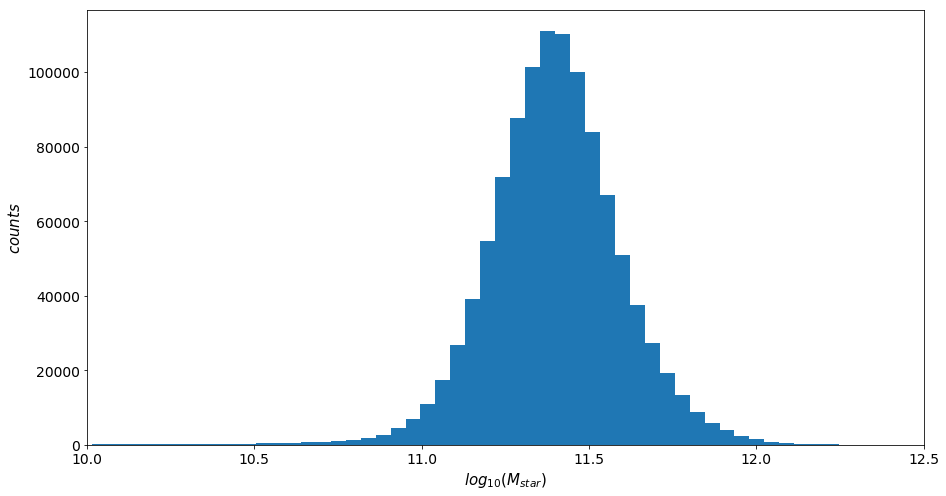

8.540206
13.006384
624
8.540206
13.006384


In [6]:
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend

print(np.median(total_mass))

plt.rcParams["figure.figsize"] = [15, 8]
# plt.title("LRG Mass distribution", fontsize=25)
plt.hist(mstar[np.where(mstar > 0)], bins=100)
# plt.axvline(linewidth=1, color='r')
plt.xlim(10., 12.5)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.xlabel(r'$log_{10}(M_{star})$', fontsize=15)
plt.ylabel(r'$counts$', fontsize=15)
plt.show()

mass_good = mstar[np.where(mstar > -1)]
print(min(mass_good))
print(max(mass_good))
print(len(mass_good[np.where(mass_good < 10)]))


# plt.rcParams["figure.figsize"] = [15, 8]
# plt.title("LRG Mass distribution", fontsize=25)
# plt.hist(mass_good[np.where(mass_good < 10)], bins=50)
# # plt.axvline(linewidth=1, color='r')
# plt.xlabel(r'$log(M_{star})$', fontsize=25)
# plt.ylabel(r'$counts$', fontsize=25)
# plt.show()

print(min(mass_good))
print(max(mass_good))

In [27]:
# Reads in data files for use in readData.py

hdu_north = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-north-specObj-dr14.fits') # this matches SDSS LRGs to MzLS/BASS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_south = fits.open('//Users/mtownsend/anaconda/Data/survey-dr8-south-specObj-dr14.fits')# this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_sdss = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdu_sweep1 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr8.fits') # this is one sweep file of the DECaLS data
hdu_sweep2 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr8.fits') # this is one sweep file of the DECaLS data

# SpecObj_data_north = hdu_north[1].data
# SpecObj_data_south = hdu_south[1].data
# SDSS_data = hdu_sdss[1].data
# DECaLS_data1 = hdu_sweep1[1].data
# DECaLS_data2 = hdu_sweep2[1].data

# id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
# id_LRG2, plate_LRG2, fiberid_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)


# print("end readdata")


In [28]:
from read_data import *


SpecObj_data_north = hdu_north[1].data
SpecObj_data_south = hdu_south[1].data
SDSS_data = hdu_sdss[1].data
DECaLS_data1 = hdu_sweep1[1].data
DECaLS_data2 = hdu_sweep2[1].data

id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
id_LRG2, plate_LRG2, fiberid_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)


print("end readdata")

done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4488579
done creating unique IDs for brick file
done identifying LRGs in survey brick
498527
done making survey cuts
done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4076998
done creating unique IDs for brick file
done identifying LRGs in survey brick
196068
done making survey cuts
end readdata


In [31]:
# calculate LRG magnitudes

gmag_LRG_nocuts = 22.5 - 2.5 * np.log10(gflux_LRG1/mw_transmission_g_LRG1)
rmag_LRG_nocuts = 22.5 - 2.5 * np.log10(rflux_LRG1/mw_transmission_r_LRG1)
zmag_LRG_nocuts = 22.5 - 2.5 * np.log10(zflux_LRG1/mw_transmission_z_LRG1)

# calculate BKG magnitudes

gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1/mw_transmission_g_BKG1)
gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2/mw_transmission_g_BKG2)
rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1/mw_transmission_r_BKG1)
rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2/mw_transmission_r_BKG2)
zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1/mw_transmission_z_BKG1)
zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2/mw_transmission_z_BKG2)

gmag_BKG_nocuts = np.concatenate([gmag_BKG1, gmag_BKG2])
rmag_BKG_nocuts = np.concatenate([rmag_BKG1, rmag_BKG2])
zmag_BKG_nocuts = np.concatenate([zmag_BKG1, zmag_BKG2])
    
# calculate LRG (g-r) and (r-z) colors
    
grcolor_LRG_nocuts = gmag_LRG_nocuts - rmag_LRG_nocuts
rzcolor_LRG_nocuts = rmag_LRG_nocuts - zmag_LRG_nocuts
    
# calculate BKG (g-r) and (r-z) colors
    
grcolor_BKG_nocuts = gmag_BKG_nocuts - rmag_BKG_nocuts
rzcolor_BKG_nocuts = rmag_BKG_nocuts - zmag_BKG_nocuts

# create full list of LRG attributes

ra_LRG_nocuts = ra_LRG1
ra_BKG_nocuts = np.concatenate([ra_BKG1, ra_BKG2])
dec_LRG_nocuts = dec_LRG1
dec_BKG_nocuts = np.concatenate([dec_BKG1, dec_BKG2])
z_LRG_nocuts = z_LRG1
id_LRG_nocuts = id_LRG1

ra_nocuts = np.concatenate([ra_LRG_nocuts, ra_BKG_nocuts])
dec_nocuts = np.concatenate([dec_LRG_nocuts, dec_BKG_nocuts])

# cut for zmag brighter than 22.75

ra_LRG = ra_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.75))]
dec_LRG = dec_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
id_LRG = id_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

z_LRG = z_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

plate_LRG = plate_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
fiberid_LRG = fiberid_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

gmag_LRG = gmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rmag_LRG = rmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
zmag_LRG = zmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
grcolor_LRG = grcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rzcolor_LRG = rzcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

ra_BKG = ra_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
dec_BKG = dec_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

gmag_BKG = gmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rmag_BKG = rmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
zmag_BKG = zmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
grcolor_BKG = grcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rzcolor_BKG = rzcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

# combine LRG and BKG lists

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])
zmag = np.concatenate([zmag_LRG, zmag_BKG])

grcolor = np.concatenate([grcolor_LRG, grcolor_BKG]) 
rzcolor = np.concatenate([rzcolor_LRG, rzcolor_BKG]) 


print(len(ra_LRG))


1355


In [7]:
# read LRG data arrays

data_raLRG = np.load('/Users/mtownsend/anaconda/Data/ra_LRG.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

data_decLRG = np.load('/Users/mtownsend/anaconda/Data/dec_LRG.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

data_zLRG = np.load('/Users/mtownsend/anaconda/Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

data_gmagLRG = np.load('/Users/mtownsend/anaconda/Data/gmag_LRG.npz')
gmagLRG = data_gmagLRG['gmag_LRG']
print(gmagLRG.shape)

print('----')

data_rmagLRG = np.load('/Users/mtownsend/anaconda/Data/rmag_LRG.npz')
rmagLRG = data_rmagLRG['rmag_LRG']
print(rmagLRG.shape)

print('----')

data_zmagLRG = np.load('/Users/mtownsend/anaconda/Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)
print(zmagLRG.min())
print(zmagLRG.max())

print('----')

data_grcolorLRG = np.load('/Users/mtownsend/anaconda/Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

data_rzcolorLRG = np.load('/Users/mtownsend/anaconda/Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)



(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
15.818878
21.957382
----
(1823,)
----
(1823,)


In [ ]:
# # read BKG data arrays

# data_raBKG = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/EDR/ra_BKG-EDR-v2-dr9.npz')
# ra_BKG = data_raBKG['raBKG']
# print(ra_BKG.shape)

# print('----')

# data_decBKG = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/EDR/dec_BKG-EDR-v2-dr9.npz')
# dec_BKG = data_decBKG['decBKG']
# print(dec_BKG.shape)

# print('----')

# data_gmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/EDR/gmag_BKG-EDR-v2-dr9.npz')
# gmag_BKG = data_gmagBKG['gmagBKG']
# print(gmag_BKG.shape)

# print('----')

# data_rmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/EDR/rmag_BKG-EDR-v2-dr9.npz')
# rmag_BKG = data_rmagBKG['rmagBKG']
# print(rmag_BKG.shape)

# print('----')

# data_zmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/EDR/zmag_BKG-EDR-v2-dr9.npz')
# zmag_BKG = data_zmagBKG['zmagBKG']
# print(zmag_BKG.shape)

# print('----')

# data_grcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/EDR/grcolor_BKG-EDR-v2-dr9.npz')
# grcolor_BKG = data_grcolorBKG['grcolorBKG']
# print(grcolor_BKG.shape)

# print('----')


# data_rzcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/EDR/rzcolor_BKG-EDR-v2-dr9.npz')
# rzcolor_BKG = data_rzcolorBKG['rzcolorBKG']
# print(rzcolor_BKG.shape)


In [8]:
from astropy.coordinates import SkyCoord, match_coordinates_sky                                   
from astropy import units as u       

mous_cat = SkyCoord(ra=ra_MOUS*u.degree, dec=dec_MOUS*u.degree)                          

my_cat = SkyCoord(ra=raLRG*u.degree, dec=decLRG*u.degree)                                

idx, sep2d, dist3d = match_coordinates_sky(my_cat, mous_cat, nthneighbor=1)
# idx, sep2d, dist3d = my_cat.match_to_catalog_sky(mous_cat)

print(raLRG[1])
print(ra_MOUS[idx[1]])

print(decLRG[1])
print(dec_MOUS[idx[1]])

mass_LRG = mstar[idx]
print(len(mass_LRG))

ra_cut = ra_MOUS[np.where((z_MOUS >= 0.2) & (z_MOUS <= 0.65) & (ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))]
dec_cut = dec_MOUS[np.where((z_MOUS >= 0.2) & (z_MOUS <= 0.65) & (ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))]
print(len(ra_cut))
print(len(ra_MOUS))


241.05811624717717
241.05811624717717
9.243933417459095
9.243933417459095
1823
1823
1078965


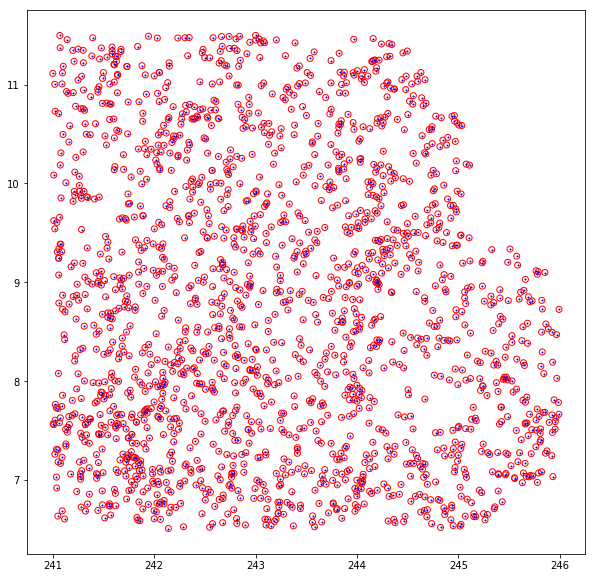

In [9]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.scatter(ra_MOUS[idx], dec_MOUS[idx], facecolors='none', edgecolors='r')
plt.scatter(raLRG, decLRG, c="blue", s=1)
# plt.scatter(ra_LRG, dec_LRG, c='blue')
plt.show()

11.395743
11.396393
6222
1078963
1078965
8.540206


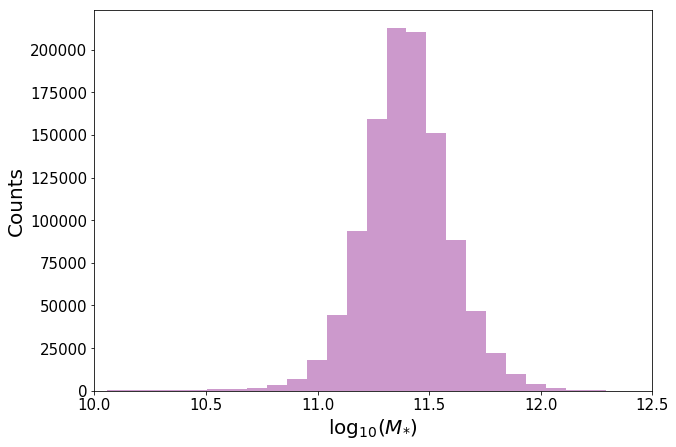

In [12]:
import pandas as pd
import seaborn as sns


import seaborn as sns

plt.rcParams["figure.figsize"] = [10, 7]
# plt.rc('text', usetex=True)
sns.distplot(mstar[np.where(mstar > 0.)], kde=False, color='purple')
# plt.title('LRG Mass Distribution', fontsize=25)
plt.xlabel('$\log_{10}(M_{*})$', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(10., 12.5)
# plt.savefig('/Users/mtownsend/Desktop/LRGmass-dist-EDR_nolables.pdf')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/LRGmass-dist-EDR_v1.jpg')

print(np.mean(mstar))
print(np.median(mstar))

mstar_full = mstar[np.where(mstar > 0.)]
print(len(mstar_full[np.where(mstar < 10.75)]))
print(len(mstar_full))
print(len(mstar))
print(min(mstar_full))

In [ ]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z_LRG)

print("end cosmoCalc")

In [ ]:
# H1, edges = np.histogramdd((rzcolor, zmag, grcolor), bins=30, range=((min(rzcolor), 29.), (min(zmag), 35.), (min(grcolor), 34.)), density=False)
H1, edges = np.histogramdd((rzcolor, zmag, grcolor), bins=50, density=False)

# make 2D projections of 3D histogram
rz_v_zmag = H1[:, :, :].sum(axis=2)
rz_vs_zmag = np.fliplr(rz_v_zmag)
gr_v_zmag = H1[:, :, :].sum(axis=0)
gr_vs_zmag = np.flipud(gr_v_zmag.T)
gr_v_rz = H1[:, :, :].sum(axis=1)
gr_vs_rz = np.flipud(gr_v_rz.T)

In [ ]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/survey-density.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)


In [ ]:
distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, zmag_LRG, zmag_BKG, rzcolor_LRG, rzcolor_BKG, grcolor_LRG, grcolor_BKG, edges)

print('end nearNeighbor')

In [ ]:
totalNear(near)

plt.show()

In [ ]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, ra_LRG, dec_LRG, pixnums, zmag, rzcolor, grcolor, edges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")


In [ ]:
totalNbkg(Nbkg)

plt.show()

Nbkg = np.array(Nbkg)

In [ ]:
Nsat = np.array(near) - np.array(Nbkg)

print("end Nsat")

In [ ]:
totalNsat(Nsat)

# plt.savefig('/Users/mtownsend/Desktop/Nsat.jpg')
plt.show()

In [ ]:
sumsat, sumsat1z, sumsat2z, sumsat3z, sumsat4z, sumsat5z, sumsat6z, sumsat7z, sumsat1r, sumsat2r, sumsat3r, sumsat4r, sumsat5r, sumsat6r, sumsat7r, sumsat1g, sumsat2g, sumsat3g, sumsat4g, sumsat5g, sumsat6g, sumsat7g, sumsat8g, sumsat1_zmag, sumsat2_zmag, sumsat3_zmag, sumsat4_zmag, sumsat5_zmag, sumsat6_zmag, sumsat7_zmag  = sumNsat(Nsat, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

sumnear, sumnear1z, sumnear2z, sumnear3z, sumnear4z, sumnear5z, sumnear6z, sumnear7z, sumnear1r, sumnear2r, sumnear3r, sumnear4r, sumnear5r, sumnear6r, sumnear7r, sumnear1g, sumnear2g, sumnear3g, sumnear4g, sumnear5g, sumnear6g, sumnear7g, sumnear8g, sumnear1_zmag, sumnear2_zmag, sumnear3_zmag, sumnear4_zmag, sumnear5_zmag, sumnear6_zmag, sumnear7_zmag = sumNN(near, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

# print(sumsat)

sumsat = np.array(sumsat)


In [ ]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.title("LRG Mass distribution", fontsize=25)
plt.hist(total_mass[idx], bins=50)
# plt.axvline(linewidth=1, color='r')
plt.xlabel(r'$Total Mass$', fontsize=25)
plt.ylabel(r'$counts$', fontsize=25)
plt.show()

print(np.median(mstar[idx]))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sumsat_mstar1 = sumsat[np.where((mstar[idx] < 10.75))]
sumsat_mstar2 = sumsat[np.where((mstar[idx] >= 10.75) & (mstar[idx] < 11.35))]
sumsat_mstar3 = sumsat[np.where((mstar[idx] >= 11.35))]

print(len(sumsat_mstar1))
print(len(sumsat_mstar2))
print(len(sumsat_mstar3))


mstar1 = mstar[np.where((mstar[idx] < 10.75))]

In [ ]:
print(np.median(sumsat_mstar1))

# sns.distplot(mstar1, kde=False, color='purple', bins=10)
# plt.title('LRG Mass Distribution, LRG Mass M*< 10.75', fontsize=20)
# plt.xlabel('log(Mass)', fontsize=17)
# plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/LRGmass-dist-mstar1_v1.pdf')
# plt.savefig('/Users/mtownsend/Desktop/LRGmass-dist-mstar1_v1.jpg')

sns.distplot(z_LRG[np.where(mstar[idx] < 10.75)], kde=False, color='purple', bins=10)
plt.title('LRG Redshift Distribution, LRG Mass M*< 10.75', fontsize=20)
plt.xlabel('Redshift', fontsize=17)
plt.ylabel('Counts', fontsize=17)
plt.savefig('/Users/mtownsend/Desktop/LRGredshift-dist-mstar1_v1.pdf')
plt.savefig('/Users/mtownsend/Desktop/LRGredshift-dist-mstar1_v1.jpg')



In [ ]:
from makeCutoutTableFunc import *

htmlstr = make_cutout_comparison_table(ra_LRG[np.where(mstar[idx] < 10.75)], dec_LRG[np.where(mstar[idx] < 10.75)], id_LRG1[np.where(mstar[idx] < 10.75)], z_LRG[np.where(mstar[idx] < 10.75)], plate_LRG[np.where(mstar[idx] < 10.75)], fiberid_LRG[np.where(mstar[idx] < 10.75)])

Html_file= open("/Users/mtownsend/Desktop/low_mass_cutouts.html","w")
Html_file.write(htmlstr)
Html_file.close()

In [ ]:
print(np.median(sumsat_mstar2))

sns.distplot(sumsat_mstar2, kde=False, color='purple')
plt.title('Satellite Galaxy Distribution, LRG Mass 10.75 < M* < 11.35', fontsize=20)
plt.xlabel('Number of Satellites', fontsize=17)
plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-mstar2_v1.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-mstar2_v1.jpg')


In [ ]:
print(np.median(sumsat_mstar3))

sns.distplot(sumsat_mstar3, kde=False, color='purple')
plt.title('Satellite Galaxy Distribution, LRG Mass M* > 11.35', fontsize=20)
plt.xlabel('Number of Satellites', fontsize=17)
plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-mstar3_v1.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-mstar3_v1.jpg')


In [ ]:
plt.scatter(z_LRG, mstar[idx], color='purple', s=3)
plt.title('LRG Mass vs LRG Redshift', fontsize=20)
plt.xlabel('LRG Redshift', fontsize=17)
plt.ylabel('LRG Mass', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/LRGmass-v-LRGz_v1.pdf')
# plt.savefig('/Users/mtownsend/Desktop/LRGmass-v-LRGz_v1.jpg')


In [ ]:
sumsat_mstar1 = sumsat[np.where((mstar[idx] < 10.75))]
sumsat_mstar2 = sumsat[np.where((mstar[idx] >= 10.75) & (mstar[idx] < 11.))]
sumsat_mstar3 = sumsat[np.where((mstar[idx] >= 11.0) & (mstar[idx] < 11.25))]
sumsat_mstar4 = sumsat[np.where((mstar[idx] >= 11.25) & (mstar[idx] < 11.5))]
sumsat_mstar5 = sumsat[np.where((mstar[idx] >= 11.5))]

print(len(sumsat_mstar1))
print(len(sumsat_mstar2))
print(len(sumsat_mstar3))
print(len(sumsat_mstar4))
print(len(sumsat_mstar5))

med_mstar1 = np.median(sumsat_mstar1)
med_mstar2 = np.median(sumsat_mstar2)
med_mstar3 = np.median(sumsat_mstar3)
med_mstar4 = np.median(sumsat_mstar4)
med_mstar5 = np.median(sumsat_mstar5)

print(med_mstar1)
print(med_mstar2)
print(med_mstar3)
print(med_mstar4)
print(med_mstar5)

mean_mstar1 = np.mean(sumsat_mstar1)
mean_mstar2 = np.mean(sumsat_mstar2)
mean_mstar3 = np.mean(sumsat_mstar3)
mean_mstar4 = np.mean(sumsat_mstar4)
mean_mstar5 = np.mean(sumsat_mstar5)

print(mean_mstar1)
print(mean_mstar2)
print(mean_mstar3)
print(mean_mstar4)
print(mean_mstar5)

In [ ]:
mstar_bins = np.array([10.75, 11, 11.25, 11.5, 12])
median_bins = np.array([med_mstar1, med_mstar2, med_mstar3, med_mstar4, med_mstar5])

plt.rcParams["figure.figsize"] = [15, 10]
plt.scatter(mstar_bins, median_bins, color='purple', s=100)
# plt.title('Median Satellite Count vs LRG Mass', fontsize=20)
# plt.xlabel('LRG Mass', fontsize=17)
# plt.ylabel('Median Satellite Count', fontsize=17)
plt.tick_params(labelsize=20)
# plt.savefig('/Users/mtownsend/Desktop/LRGmass-v-MedSatCount_v1.pdf')
# plt.savefig('/Users/mtownsend/Desktop/LRGmass-v-MedSatCount_v1.jpg')


In [ ]:
mstar_bins = np.array([10.75, 11, 11.25, 11.5, 12])
mean_bins = np.array([mean_mstar1, mean_mstar2, mean_mstar3, mean_mstar4, mean_mstar5])

plt.rcParams["figure.figsize"] = [15, 10]
plt.scatter(mstar_bins, mean_bins, color='purple', s=200)
plt.tick_params(labelsize=30)
# plt.title('Mean Satellite Count vs LRG Mass', fontsize=20)
# plt.xlabel('LRG Mass', fontsize=17)
# plt.ylabel('Mean Satellite Count', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/LRGmass-v-MeanSatCount_v1.pdf')
plt.savefig('/Users/mtownsend/Desktop/LRGmass-v-MeanSatCount_nolabels.jpg')


In [ ]:
# f, ax = plt.subplots(figsize=(15,15))
# cm = plt.cm.get_cmap('rainbow')
# plt.scatter(mstar[idx], sumsat, c=z_LRG, s=10, cmap=cm)
# plt.scatter(z_LRG, sumsat, c=np.log10(total_mass[idx]), s=10, cmap=cm)
# plt.title('LRG Redshift vs # of Satellites', fontsize=20)
# plt.xlabel('LRG Redshift', fontsize=17)
# plt.ylabel('# of Satellites', fontsize=17)
# plt.tick_params(labelsize=20)
# # plt.xlim(10.75, 12.)
# # plt.ylim(-40., 80.)
# cb = plt.colorbar()
# cb.set_label('log(LRG Mass)', rotation=270, fontsize=15, labelpad=30)
# cb.ax.tick_params(labelsize=15)
# plt.savefig('/Users/mtownsend/Desktop/LRGredshift-v-SatNum_withLRGmass_v2.pdf')
# plt.savefig('/Users/mtownsend/Desktop/LRGredshift-v-SatNum_withLRGmass_v2.jpg')
# plt.show()

from scipy import stats
sns.set_style('white')

mass = mstar[idx]
mass1 = mass[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))]
mass2 = mass[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))]
mass3 = mass[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))]
mass4 = mass[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))]

sumsat1 = sumsat[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))]
sumsat2 = sumsat[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))]
sumsat3 = sumsat[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))]
sumsat4 = sumsat[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))]

print(len(mass[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))]))
print(len(mass[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))]))
print(len(mass[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))]))
print(len(mass[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))]))

corr1, pval1 = stats.spearmanr(mass1, sumsat1)
corr2, pval2 = stats.spearmanr(mass2, sumsat2)
corr3, pval3 = stats.spearmanr(mass3, sumsat3)
corr4, pval4 = stats.spearmanr(mass4, sumsat4)

print("redshift bin 1")
print(corr1)
print(pval1)
print('----')
print("redshift bin 2")
print(corr2)
print(pval2)
print('----')
print("redshift bin 3")
print(corr3)
print(pval3)
print('----')
print("redshift bin 4")
print(corr4)
print(pval4)
print('----')



# slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(mass[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))], sumsat[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))])
# slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(mass[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))], sumsat[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))])
# slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(mass[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))], sumsat[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))])
# slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(mass[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))], sumsat[np.where((z_LRG >= 0.5) & (z_LRG <= 0.65))])
# slope_all, intercept_all, r_value_all, p_value_all, std_err_all = stats.linregress(mass, sumsat)

# y1 = slope1*mass[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))] + intercept1
# y2 = slope2*mass[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))] + intercept2
# y3 = slope3*mass[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))] + intercept3
# y4 = slope4*mass[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))] + intercept4
# y_all = slope_all * mass + intercept_all

# moe1 = 2.065 * std_err1
# moe2 = 2.595 * std_err2
# moe3 = 2.586 * std_err3
# moe4 = 2.581 * std_err4
# moe_all = 2.579 * std_err_all

# lb1 =  y1 - moe1
# lb2 =  y2 - moe2
# lb3 =  y3 - moe3
# lb4 =  y4 - moe4
# lb_all = y_all - moe_all

# ub1 =  y1 + moe1
# ub2 =  y2 + moe2
# ub3 =  y3 + moe3
# ub4 =  y4 + moe4
# ub_all = y_all + moe_all

# print("slopes:")
# print(slope1)
# print(slope2)
# print(slope3)
# print(slope4)
# print("")
# print("intercepts:")
# print(intercept1)
# print(intercept2)
# print(intercept3)
# print(intercept4)
# print("")
# print("r-value:")
# print(r_value1)
# print(r_value2)
# print(r_value3)
# print(r_value4)
# print("")
# print("standard error:")
# print(std_err1)
# print(std_err2)
# print(std_err3)
# print(std_err4)

# plt.scatter(mass[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))], sumsat[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))], c='indigo', s=25, label="0.2 < z < 0.3")
# # plt.plot(mass[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))], y1 , c='black', lw=4)
# # plt.title('LRG Redshift vs # of Satellites', fontsize=20)
# plt.xlabel('LRG Mass', fontsize=40)
# plt.ylabel('# of Satellites', fontsize=40)
# plt.tick_params(axis='both', which='major', labelsize=35)
# lgnd = plt.legend(loc='upper left', fontsize=35)
# lgnd.legendHandles[0]._sizes = [30]
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/satnum_vs_LRGmass_z1-v2.pdf')
# # plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/satnum_vs_LRGmass_z1-v1.jpg')
# plt.show()


# plt.scatter(mass[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))], sumsat[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))], c='indigo', s=25, label="0.3 < z < 0.4")
# # plt.plot(mass[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))], y2 , c='black', lw=4)
# # plt.title('LRG Redshift vs # of Satellites', fontsize=20)
# plt.xlabel('LRG Mass', fontsize=40)
# plt.ylabel('# of Satellites', fontsize=40)
# plt.tick_params(axis='both', which='major', labelsize=35)
# lgnd = plt.legend(loc='upper left', fontsize=35)
# lgnd.legendHandles[0]._sizes = [30]
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/satnum_vs_LRGmass_z2-v2.pdf')
# # plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/satnum_vs_LRGmass_z2-v1.jpg')
# plt.show()

# plt.scatter(mass[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))], sumsat[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))], c='indigo', s=25, label="0.4 < z < 0.5")
# # plt.plot(mass[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))], y3 , c='black', lw=4)
# # plt.title('LRG Redshift vs # of Satellites', fontsize=20)
# plt.xlabel('LRG Mass', fontsize=40)
# plt.ylabel('# of Satellites', fontsize=40)
# plt.tick_params(axis='both', which='major', labelsize=35)
# lgnd = plt.legend(loc='upper left', fontsize=35)
# lgnd.legendHandles[0]._sizes = [30]
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/satnum_vs_LRGmass_z3-v2.pdf')
# # plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/satnum_vs_LRGmass_z3-v1.jpg')
# plt.show()

plt.scatter(mass[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))], sumsat[np.where((z_LRG >= 0.5) & (z_LRG <= 0.65))], c='indigo', s=25, label="0.5 < z < 0.65")
# plt.plot(mass[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))], y4 , c='black', lw=4)
# plt.title('LRG Redshift vs # of Satellites', fontsize=20)
plt.xlabel('LRG Mass', fontsize=40)
plt.ylabel('# of Satellites', fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=35)
lgnd = plt.legend(loc='upper left', fontsize=35)
lgnd.legendHandles[0]._sizes = [30]
plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/satnum_vs_LRGmass_z4-v2.pdf')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/satnum_vs_LRGmass_z4-v1.jpg')
plt.show()


# plt.scatter(mass, sumsat, c='indigo', s=25, label="All Redshifts")
# plt.plot(mass[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))], y1 , c='red', lw=4, label="0.2 < z < 0.3")
# plt.plot(mass[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))], ub1, c='red', linestyle='--')
# plt.plot(mass[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))], lb1, c ='red',linestyle='--')
# # plt.fill_between(mass[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))], ub1, lb1, facecolor='red', alpha=0.2)
             
# plt.plot(mass[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))], y2 , c='blue', lw=4, label="0.3 < z < 0.4")
# plt.plot(mass[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))], ub2, c='blue', linestyle='--')
# plt.plot(mass[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))], lb2, c='blue', linestyle='--')
# # plt.fill_between(mass[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))], ub2, lb2, facecolor='blue', alpha=0.2)
             
# plt.plot(mass[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))], y3 , c='green', lw=4, label="0.4 < z < 0.5")
# plt.plot(mass[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))], ub3, c='green', linestyle='--')
# plt.plot(mass[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))], lb3, c='green', linestyle='--')
# # plt.fill_between(mass[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))], ub3, lb3, facecolor='green', alpha=0.2)           
             
# plt.plot(mass[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))], y4 , c='orange', lw=4, label="0.5 < z < 0.65")
# plt.plot(mass[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))], ub4, c='orange', linestyle='--')
# plt.plot(mass[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))], lb4, c='orange', linestyle='--')
# # plt.fill_between(mass[np.where((z_LRG >= 0.5) & (z_LRG < 0.65))], ub4, lb4, facecolor='orange', alpha=0.2)           
             
# # plt.title('LRG Redshift vs # of Satellites', fontsize=20)
# plt.xlabel('LRG Mass', fontsize=30)
# plt.ylabel('# of Satellites', fontsize=30)
# plt.tick_params(axis='both', which='major', labelsize=25)
# lgnd = plt.legend(loc='upper left', fontsize=25)
# lgnd.legendHandles[0]._sizes = [30]
# # plt.savefig('/Users/mtownsend/Desktop/LRGredshift-v-SatNum_withLRGmass_v2.pdf')
# # plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/satnum_vs_LRGmass_errors-v1.jpg')
# plt.show()



# import pandas as pd
# import seaborn as sns


# import seaborn as sns

# plt.rcParams["figure.figsize"] = [20, 15]
# sns.distplot(mass, kde=False, color='purple')
# # plt.title('LRG Mass Distribution', fontsize=25)
# plt.xlabel('LRG Mass', fontsize=30)
# plt.ylabel('Counts', fontsize=30)
# plt.tick_params(axis='both', which='major', labelsize=25)
# # plt.savefig('/Users/mtownsend/Desktop/LRGmass-dist-EDR_nolables.pdf')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/LRGmass-dist-EDR_v2.jpg')

# print(np.mean(mstar))
# print(np.median(mstar))

# mstar_full = mstar[np.where(mstar > 0.)]
# print(len(mstar_full[np.where(mstar < 10.75)]))
# print(len(mstar_full))
# print(len(mstar))
# print(min(mstar_full))



In [ ]:
# mstar bins
mstarbin_a = ((mstar[idx] >= 11.) & (mstar[idx] < 11.2))
mstarbin_b = ((mstar[idx] >= 11.2) & (mstar[idx] < 11.4))
mstarbin_c = ((mstar[idx] >= 11.4) & (mstar[idx] < 11.6))
mstarbin_d = ((mstar[idx] >= 11.6) & (mstar[idx] < 11.8))
mstarbin_e = ((mstar[idx] >= 11.8) & (mstar[idx] < 12.))
mstarbin_f = ((mstar[idx] >= 11.) & (mstar[idx] < 12.))

zbin_1 = (z_LRG < 0.3)
zbin_2 = ((z_LRG >= 0.3) & (z_LRG < 0.5))
zbin_3 = ((z_LRG >= 0.5) & (z_LRG < 0.65))
zbin_4 = ((z_LRG >= 0.2) & (z_LRG <= 0.65))
          
sumsat_a1 = sumsat[np.where((mstarbin_a) & (zbin_1))]
sumsat_a2 = sumsat[np.where((mstarbin_a) & (zbin_2))]
sumsat_a3 = sumsat[np.where((mstarbin_a) & (zbin_3))]
sumsat_a4 = sumsat[np.where((mstarbin_a) & (zbin_4))]

sumsat_b1 = sumsat[np.where((mstarbin_b) & (zbin_1))]
sumsat_b2 = sumsat[np.where((mstarbin_b) & (zbin_2))]
sumsat_b3 = sumsat[np.where((mstarbin_b) & (zbin_3))]
sumsat_b4 = sumsat[np.where((mstarbin_b) & (zbin_4))]

sumsat_c1 = sumsat[np.where((mstarbin_c) & (zbin_1))]
sumsat_c2 = sumsat[np.where((mstarbin_c) & (zbin_2))]
sumsat_c3 = sumsat[np.where((mstarbin_c) & (zbin_3))]
sumsat_c4 = sumsat[np.where((mstarbin_c) & (zbin_4))]

sumsat_d1 = sumsat[np.where((mstarbin_d) & (zbin_1))]
sumsat_d2 = sumsat[np.where((mstarbin_d) & (zbin_2))]
sumsat_d3 = sumsat[np.where((mstarbin_d) & (zbin_3))]
sumsat_d4 = sumsat[np.where((mstarbin_d) & (zbin_4))]

sumsat_e1 = sumsat[np.where((mstarbin_e) & (zbin_1))]
sumsat_e2 = sumsat[np.where((mstarbin_e) & (zbin_2))]
sumsat_e3 = sumsat[np.where((mstarbin_e) & (zbin_3))]
sumsat_e4 = sumsat[np.where((mstarbin_e) & (zbin_4))]

sumsat_f1 = sumsat[np.where((mstarbin_f) & (zbin_1))]
sumsat_f2 = sumsat[np.where((mstarbin_f) & (zbin_2))]
sumsat_f3 = sumsat[np.where((mstarbin_f) & (zbin_3))]
sumsat_f4 = sumsat[np.where((mstarbin_f) & (zbin_4))]


print(len(mstar_a1))



In [ ]:
fig, axs = plt.subplots(6, 4, figsize=(20,20))
fig.tight_layout()

fig.suptitle("Histogram of the Number of Satellites at Different LRG Redshifts and Masses", fontsize=15, y=1.02)

axs[0, 0].hist(sumsat_a1, bins=50, fc='blue')
axs[0, 0].set_title('z < 0.3')
axs[0, 0].set_ylabel('11 < log(M) < 11.2', labelpad=18)
axs[0, 1].hist(sumsat_a2, bins=50, fc='orange')
axs[0, 1].set_title('0.3 < z < 0.5')
axs[0, 2].hist(sumsat_a3, bins=50, fc='purple')
axs[0, 2].set_title('0.5 < z < 0.65')
axs[0, 3].hist(sumsat_a4, bins=50, fc='green')
axs[0, 3].set_title('All LRG z')

axs[1, 0].hist(sumsat_b1, bins=50, fc='blue')
axs[1, 0].set_ylabel('11.2 < log(M) < 11.4', labelpad=22)
axs[1, 1].hist(sumsat_b2, bins=50, fc='orange')
axs[1, 2].hist(sumsat_b3, bins=50, fc='purple')
axs[1, 3].hist(sumsat_b4, bins=50, fc='green')

axs[2, 0].hist(sumsat_c1, bins=50, fc='blue')
axs[2, 0].set_ylabel('11.4 < log(M) < 11.6', labelpad=22)
axs[2, 1].hist(sumsat_c2, bins=50, fc='orange')
axs[2, 2].hist(sumsat_c3, bins=50, fc='purple')
axs[2, 3].hist(sumsat_c4, bins=50, fc='green')

axs[3, 0].hist(sumsat_d1, bins=50, fc='blue')
axs[3, 0].set_ylabel('11.6 < log(M) < 11.8', labelpad=18)
axs[3, 1].hist(sumsat_d2, bins=50, fc='orange')
axs[3, 2].hist(sumsat_d3, bins=50, fc='purple')
axs[3, 3].hist(sumsat_d4, bins=50, fc='green')

axs[4, 0].hist(sumsat_e1, bins=50, fc='blue')
axs[4, 0].set_ylabel('11.8 < log(M) < 12', labelpad=18)
axs[4, 1].hist(sumsat_e2, bins=50, fc='orange')
axs[4, 2].hist(sumsat_e3, bins=50, fc='purple')
axs[4, 3].hist(sumsat_e4, bins=50, fc='green')

axs[5, 0].hist(sumsat_f1, bins=50, fc='blue')
axs[5, 0].set_ylabel('All LRG Mass', labelpad=18)
axs[5, 1].hist(sumsat_f2, bins=50, fc='orange')
axs[5, 2].hist(sumsat_f3, bins=50, fc='purple')
axs[5, 3].hist(sumsat_f4, bins=50, fc='green')

# plt.savefig('/Users/mtownsend/Desktop/Nsat-hist-LRGmass-LRGz-bins_v1.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-hist-LRGmass-LRGz-bins_v1.jpg')

plt.show()

In [ ]:
import seaborn as sns; sns.set_style('white')
import matplotlib.pyplot as plt


sns.set(font_scale=2, style='white')
h = sns.jointplot(mstar[idx], sumsat, color="purple", height=10, kind='hex')

# JointGrid has a convenience function
h.set_axis_labels('Mass', 'Number of Satellites', fontsize=25)
# h.fig.axes[0].invert_xaxis()

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

plt.savefig('/Users/mtownsend/Desktop/LRGmass_vs_Nsat_wHist_v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/LRGmass_vs_Nsat_wHist_v1.pdf')